In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [65]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [66]:
df['customerID'].nunique()

7043

In [67]:
df = df.drop(columns=['customerID'])

In [68]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

In [69]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
# categorical   'MultipleLines', 'InternetService', 'OnlineSecurity',
    #    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    #    'StreamingMovies', 'Contract', 'PaymentMethod'
# binary 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling'
# numerical 'tenure', 'MonthlyCharges', 'TotalCharges'

In [71]:
cols_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
encoder = OrdinalEncoder()  
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

In [72]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'Contract', 'PaymentMethod']

# Fit and transform the specified columns using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[cols_to_encode])

# Convert the encoded array to a DataFrame with appropriate column names and same index as df
encoded_df = pd.DataFrame(encoded_array, 
                          columns=encoder.get_feature_names_out(cols_to_encode),
                          index=df.index)

# Drop the original columns from the DataFrame
df_remaining = df.drop(columns=cols_to_encode)

# Concatenate the encoded columns with the remaining columns
df = pd.concat([encoded_df, df_remaining], axis=1)

In [74]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset with stratification on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 40), (1409, 40), (5634,), (1409,))

In [76]:
df.dtypes

MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No                          float64
OnlineSecurity_No internet service         float64
OnlineSecurity_Yes                         float64
OnlineBackup_No                            float64
OnlineBackup_No internet service           float64
OnlineBackup_Yes                           float64
DeviceProtection_No                        float64
DeviceProtection_No internet service       float64
DeviceProtection_Yes                       float64
TechSupport_No                             float64
TechSupport_No internet service            float64
TechSupport_Yes                            float64
StreamingTV_No                             float64
StreamingTV_No internet service

In [77]:
df

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1,0.0,1.0,29.85,29.85,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2,1.0,1.0,53.85,108.15,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2,1.0,1.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,24,1.0,1.0,84.80,1990.50,0.0
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,72,1.0,1.0,103.20,7362.90,0.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,11,0.0,1.0,29.60,346.45,0.0
7041,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,4,1.0,1.0,74.40,306.60,1.0


In [78]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
f1_rf = metrics.f1_score(y_test,predict, average='macro')
f1_rf

0.7058150093324889

In [79]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)
predict=gb.predict(X_test)
f1_gb = metrics.f1_score(y_test,predict, average='macro')
f1_gb

0.7316248951876642

In [80]:
round(f1_gb - f1_rf, 2)

0.03

In [81]:
train_scores = []
test_scores = []
depths = range(1, 21)

for depth in depths:
    # Create and train the model with the current max_depth
    gb = GradientBoostingClassifier(random_state=1, max_depth=depth)
    gb.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = gb.predict(X_train)
    y_test_pred = gb.predict(X_test)
    
    # Compute F1 macro scores
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Append scores to the lists
    train_scores.append(train_f1)
    test_scores.append(test_f1)

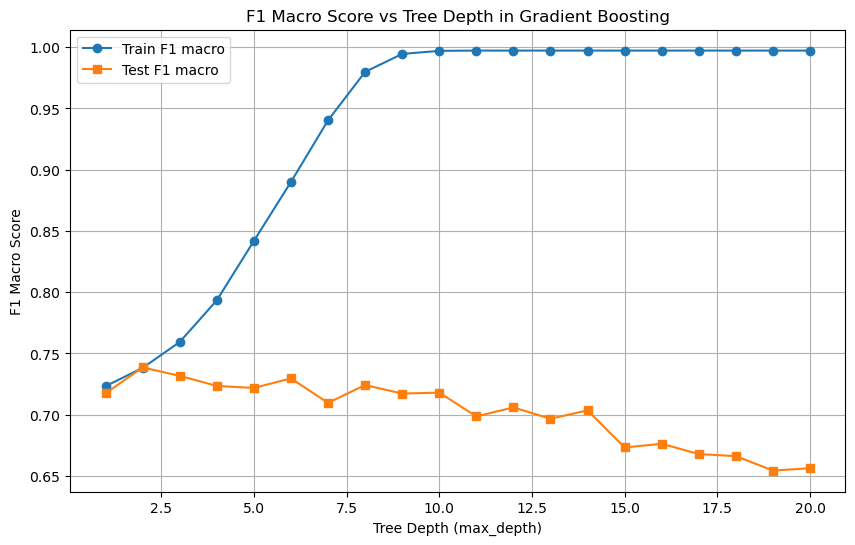

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Train F1 macro')
plt.plot(depths, test_scores, marker='s', label='Test F1 macro')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('F1 Macro Score')
plt.title('F1 Macro Score vs Tree Depth in Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

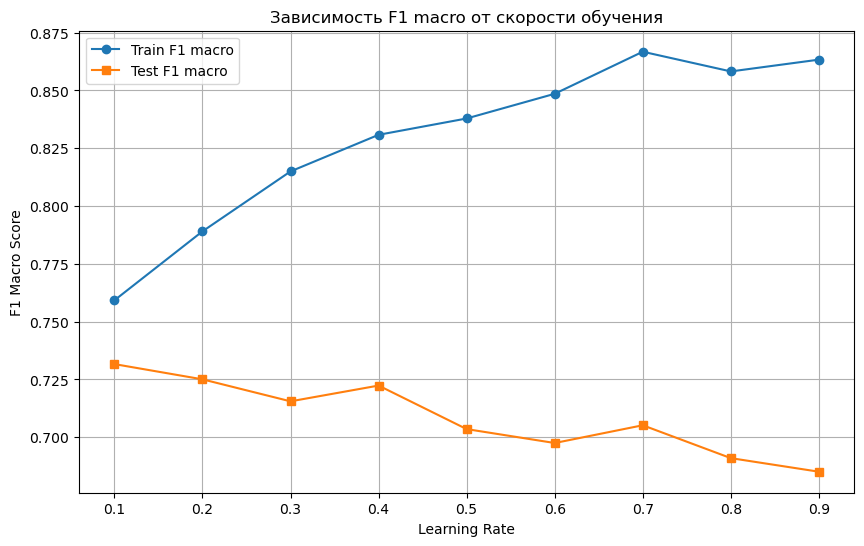

Train F1 macro scores: [0.7591926876370532, 0.7890167834976388, 0.8149429854535177, 0.8307706054009867, 0.8378332044974943, 0.8485126589503003, 0.8666982136519579, 0.8581744759813903, 0.8632747433107417]
Test F1 macro scores: [0.7316248951876642, 0.7250362615704858, 0.7155201029357917, 0.7223402573906493, 0.7035131087020864, 0.6974972513797799, 0.705173190831831, 0.690955266955267, 0.685082858050722]


In [83]:
learning_rates = np.arange(0.1, 1.0, 0.1)

train_scores = []
test_scores = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(random_state=1, learning_rate=lr)
    gb.fit(X_train, y_train)
    
    # Предсказания для обучающей и тестовой выборок
    y_train_pred = gb.predict(X_train)
    y_test_pred = gb.predict(X_test)
    
    # Вычисление macro F1-метрики
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    train_scores.append(train_f1)
    test_scores.append(test_f1)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_scores, marker='o', label='Train F1 macro')
plt.plot(learning_rates, test_scores, marker='s', label='Test F1 macro')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Macro Score')
plt.title('Зависимость F1 macro от скорости обучения')
plt.legend()
plt.grid(True)
plt.show()

print("Train F1 macro scores:", train_scores)
print("Test F1 macro scores:", test_scores)

In [92]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

categorical = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'Contract', 'PaymentMethod']

binary = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

selected_columns = categorical + binary
df = df[selected_columns]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset with stratification on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [93]:
cat_features = categorical + binary[:-1]

cb = CatBoostClassifier(random_state=1, n_estimators=100)
cb.fit(X_train, y_train, cat_features=cat_features, verbose=False)

y_pred = cb.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')

print(round(f1, 3))

0.707
